In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
!wget https://gitlab.com/huseinzol05/deep-learning-tutorial-tensorflow/raw/master/dataset/movie.csv

--2018-05-13 06:06:05--  https://gitlab.com/huseinzol05/deep-learning-tutorial-tensorflow/raw/master/dataset/movie.csv
Resolving gitlab.com (gitlab.com)... 52.167.219.168
Connecting to gitlab.com (gitlab.com)|52.167.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1545051 (1.5M) [text/plain]
Saving to: ‘movie.csv’

movie.csv           100%[===================>]   1.47M  --.-KB/s    in 0.1s    

2018-05-13 06:06:06 (13.9 MB/s) - ‘movie.csv’ saved [1545051/1545051]



In [5]:
movies = pd.read_csv('movie.csv')
movies = movies.dropna()
movies.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
5         ...                         738.0  English      USA           PG-13   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
5  263700000.0      2012.0                  632.0        6.6          2.35   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
5                24000  

[5 rows x 28 columns]

In [6]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [25]:
movies.plot_keywords.iloc[:4]

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
Name: plot_keywords, dtype: object

In [0]:
# we want to suggest based on genres, imdb scores, director name, plot keywords

# do it for director name

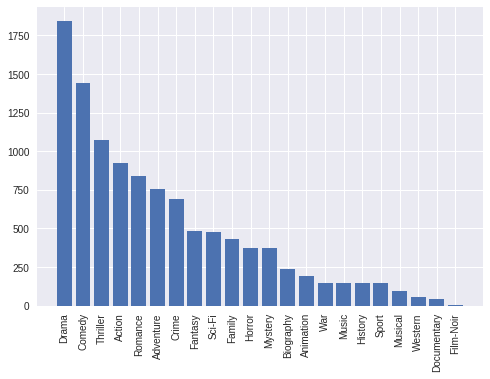

In [20]:
genres = []
for i in range(movies.shape[0]):
  genres += movies.genres.iloc[i].split('|')
genres, genres_count = np.unique(genres,return_counts=True)
genres_count_argsort = np.argsort(genres_count)[::-1]
genres_count = genres_count[genres_count_argsort]
genres = genres[genres_count_argsort]

plt.bar(np.arange(genres_count.shape[0]),genres_count)
plt.xticks(np.arange(genres_count.shape[0]),genres,rotation=90)
plt.show()

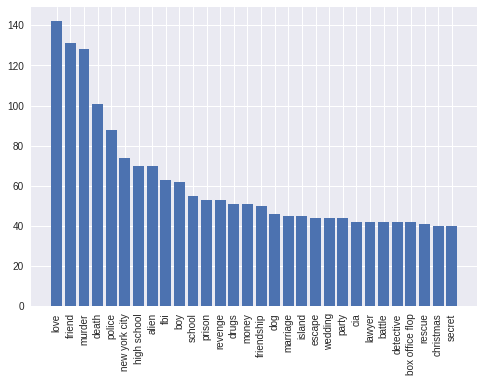

In [27]:
plot_keywords = []
for i in range(movies.shape[0]):
  plot_keywords += movies.plot_keywords.iloc[i].split('|')
plot_keywords, plot_keywords_count = np.unique(plot_keywords,return_counts=True)
plot_keywords_count_argsort = np.argsort(plot_keywords_count)[::-1]
plot_keywords_count = plot_keywords_count[plot_keywords_count_argsort][:30]
plot_keywords = plot_keywords[plot_keywords_count_argsort][:30]

plt.bar(np.arange(plot_keywords_count.shape[0]),plot_keywords_count)
plt.xticks(np.arange(plot_keywords_count.shape[0]),plot_keywords,rotation=90)
plt.show()

In [30]:
genres = []
for i in range(movies.shape[0]):
  genres += movies.genres.iloc[i].split('|')
genres = np.unique(genres)

plot_keywords = []
for i in range(movies.shape[0]):
  plot_keywords += movies.plot_keywords.iloc[i].split('|')
plot_keywords = np.unique(plot_keywords)

director_names = np.unique(movies.director_name)
print(genres.shape,plot_keywords.shape, director_names.shape)

(22,) (6724,) (1659,)


In [0]:
def dynamic_dimension(index):
  labels = []
  labels.append(movies.director_name.iloc[index])
  labels += movies.plot_keywords.iloc[index].split('|')
  labels += movies.genres.iloc[index].split('|')
  return labels

In [35]:
movies.movie_title[:10]

0                                       Avatar
1     Pirates of the Caribbean: At World's End
2                                      Spectre
3                        The Dark Knight Rises
5                                  John Carter
6                                 Spider-Man 3
7                                      Tangled
8                      Avengers: Age of Ultron
9       Harry Potter and the Half-Blood Prince
10          Batman v Superman: Dawn of Justice
Name: movie_title, dtype: object

In [34]:
dynamic_dimension(1)

['Gore Verbinski',
 'goddess',
 'marriage ceremony',
 'marriage proposal',
 'pirate',
 'singapore',
 'Action',
 'Adventure',
 'Fantasy']

In [0]:
def create_artificial_dimension(labels):
  zeros = np.zeros((movies.shape[0],len(labels)))
  for i in ['director_name','plot_keywords','genres']:
    for k in range(movies.shape[0]):
      try:
        for s in movies[i].iloc[k].split('|'):
          if s in labels:
            zeros[k,labels.index(s)] += 1
      except:
        continue
  return zeros

In [0]:
end_of_world = dynamic_dimension(1)
similar_matrix = create_artificial_dimension(end_of_world)

In [41]:
similar_matrix[:10]

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.]])

In [43]:
# euclidean distance
x1 = np.array([1,2,3])
y1 = np.array([2,3,4])
np.sqrt(np.sum((x1-y1) ** 2))

1.7320508075688772

In [0]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, 
                             algorithm='auto', 
                             metric='sqeuclidean').fit(similar_matrix)
xtest = similar_matrix[1, :]
xtest = xtest.reshape(1,-1)
distances, indices = neighbors.kneighbors(xtest)

In [66]:
for i in indices[0][:]:
  print(movies.movie_title.iloc[i],movies.imdb_score.iloc[i],
       movies.num_critic_for_reviews.iloc[i])

Pirates of the Caribbean: At World's End 7.1 302.0
Pirates of the Caribbean: The Curse of the Black Pearl 8.1 271.0
Pirates of the Caribbean: On Stranger Tides 6.7 448.0
Pirates of the Caribbean: Dead Man's Chest 7.3 313.0
Batman Forever 5.4 144.0
Stardust 7.7 228.0
Hellboy II: The Golden Army 7.0 345.0
Star Wars: Episode IV - A New Hope 8.7 282.0
Eragon 5.1 170.0
The Huntsman: Winter's War 6.1 231.0


![alt text](https://raw.githubusercontent.com/huseinzol05/Machine-Learning-Data-Science-Reuse/37d9566be0af03c054736fd5f969543f8bd66ccc/Suggestion-Engine/CodeCogsEqn.png)

In [0]:
def gaussian_filter_2d(x,y, std):
  return np.exp((-x**2-y**2)/2*std**2)

In [0]:
# sort based on imdb_score, num_critic_for_reviews
def extract_ratings(index, list_films):
  imdbs, critics = [], []
  for i in list_films:
    imdbs.append(movies.imdb_score.iloc[i])
    critics.append(movies.num_critic_for_reviews.iloc[i]/50)
  imdbs_std = np.std(imdbs)
  critics_std = np.std(critics)
  imdb_selected = movies.imdb_score.iloc[index]
  critics_selected = movies.num_critic_for_reviews.iloc[i] / 50
  result_imdb = [gaussian_filter_2d(i,imdb_selected,
                                       imdbs_std) for i in imdbs]
  result_imdb = [2*np.pi*imdbs_std**2*i for i in result_imdb]
  result_critic = [gaussian_filter_2d(i,critics_selected,
                                       critics_std) for i in critics]
  
  result_critic = [2*np.pi*critics_std**2*i for i in result_critic]
  
  combined = np.array(result_imdb) * np.array(result_critic)
  argsort_gaussian = np.argsort(combined)
  return np.array(list_films)[argsort_gaussian]

In [107]:
new_indices = extract_ratings(1,indices[0][:].tolist())
for i in new_indices:
  print(movies.movie_title.iloc[i],movies.imdb_score.iloc[i],
       movies.num_critic_for_reviews.iloc[i])

Pirates of the Caribbean: On Stranger Tides 6.7 448.0
Hellboy II: The Golden Army 7.0 345.0
Star Wars: Episode IV - A New Hope 8.7 282.0
Pirates of the Caribbean: Dead Man's Chest 7.3 313.0
Pirates of the Caribbean: At World's End 7.1 302.0
Pirates of the Caribbean: The Curse of the Black Pearl 8.1 271.0
Stardust 7.7 228.0
The Huntsman: Winter's War 6.1 231.0
Eragon 5.1 170.0
Batman Forever 5.4 144.0
